In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()


df = pd.DataFrame(digits.data, columns=digits.feature_names) 
df["target"] = digits.target


In [97]:
df.isnull().sum() 


pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [98]:
df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [126]:
import pandas as pd
df.to_csv('DIGITS.csv', index=False)

In [99]:
print(df.columns)
print(df.shape)

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')
(1797, 65)


In [100]:

sum=0
for i in df.skew(): 
    if((i>1.5) or (i<-1)):
        print(i)
        sum+=1
print(sum)

4.004889145630366
-1.2446732583940652
-1.1355327936227209
2.850641160612328
9.927679686862936
18.481247841485878
1.7191775274145593
2.245838621381367
9.538616656815936
25.14018140393825
2.2339888177426395
10.873585814891324
29.949930372410314
1.5393515019671569
21.14233509701741
20.21539886740942
2.403074716627257
14.611190026422104
35.29815470177782
3.7346981923427194
6.382821783396587
42.3910367884533
4.5607143770528635
-1.3389767446469116
-1.2104560573593286
2.1787780976411644
6.076762039144469
27


In [101]:
X = df.drop("target", axis=1)  
y = df["target"]

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

In [103]:
pt = PowerTransformer(method="yeo-johnson")
X_pt = pt.fit_transform(X)

In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pt)

In [105]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [106]:
explained_variance=pca.explained_variance_ratio_

In [107]:
cumulative_variance=np.cumsum(explained_variance)

In [108]:
n_components=np.argmax(cumulative_variance>=0.93)+1
print(n_components)

36


In [109]:
pca = PCA(n_components=n_components)
X_reduce = pca.fit_transform(X_scaled)

In [110]:
X_reduce

array([[-1.99646341,  1.67228159, -4.28484364, ..., -0.05730512,
         0.10848951, -0.45224824],
       [-1.09001407, -1.8115636 ,  3.52564941, ..., -0.0397022 ,
         0.14807263, -0.07577236],
       [-1.50669413, -0.09566947,  3.09561751, ..., -0.55220947,
         0.59612427, -0.22159267],
       ...,
       [-1.26958645, -1.04878178,  2.23760332, ..., -0.01618104,
         0.57476764, -0.50111048],
       [-0.94150081,  1.205794  , -2.73297125, ...,  0.00755019,
        -0.16617019, -0.64968762],
       [ 1.76760494,  2.35738438,  1.1543029 , ..., -0.18678522,
         0.99407261,  0.83684592]])

In [112]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [113]:
loadings=pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=X.columns
) 

In [114]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
pixel_0_0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000
pixel_0_1,0.195485,-0.027964,0.008845,-0.120008,0.003814,0.122517,0.166084,-0.156424,-0.080941,0.057585,...,-0.056449,0.148609,0.086947,0.032570,-0.214378,0.099681,-0.042487,-0.187667,-0.253984,-0.121791
pixel_0_2,0.291934,-0.030124,-0.066335,-0.172308,0.039681,-0.038110,0.064520,-0.048318,-0.098624,-0.049033,...,0.040601,-0.024940,0.068853,-0.073419,0.188497,-0.037392,0.007990,0.061457,0.018007,-0.170300
pixel_0_3,0.218234,0.018417,-0.009424,-0.163506,0.098396,-0.181423,-0.063605,-0.031162,-0.104718,-0.060694,...,0.114983,0.015331,0.016856,0.158401,0.091234,0.022726,-0.190704,0.067949,0.008635,0.251764
pixel_0_4,0.002622,-0.149813,-0.090916,0.005816,0.060093,0.135976,-0.161435,-0.028266,0.172159,0.140460,...,-0.011061,0.048681,0.126211,0.012529,-0.047695,0.072281,-0.136690,0.061457,0.105266,-0.026168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_3,0.204884,0.011060,-0.063815,-0.173432,-0.029187,-0.117844,-0.001101,0.040242,-0.060881,-0.083194,...,0.026335,-0.123524,-0.083911,0.129007,0.018204,-0.006069,0.179788,-0.049437,-0.118876,0.196551
pixel_7_4,0.028792,0.257803,0.005700,0.144334,-0.042254,0.158905,0.083484,0.082044,0.069651,-0.053109,...,-0.035158,-0.265005,-0.221329,0.032716,-0.057033,-0.079885,-0.183738,0.045094,-0.213750,-0.145374
pixel_7_5,0.096829,0.267383,0.030176,0.233061,-0.066719,0.052809,0.026347,0.040160,0.198782,-0.011835,...,0.077540,-0.102149,0.015947,-0.088253,0.156488,-0.027482,-0.014201,0.064234,-0.038508,-0.007202
pixel_7_6,0.110266,0.209312,0.112313,0.157293,-0.126369,-0.133348,-0.014617,-0.010019,0.191855,0.049578,...,0.047324,0.043874,0.239130,-0.104277,0.313967,0.033766,0.200882,0.045902,-0.097769,0.052673


In [115]:
importance = (np.abs(loadings)*pca.explained_variance_ratio_).sum(axis=1)
importance = importance.sort_values(ascending=False)

In [116]:
importance.head(36)

pixel_4_6    0.105759
pixel_2_1    0.105533
pixel_3_4    0.104660
pixel_3_1    0.104296
pixel_2_4    0.103345
pixel_7_6    0.103230
pixel_1_3    0.102667
pixel_3_2    0.102351
pixel_5_5    0.102124
pixel_3_5    0.100965
pixel_2_2    0.100734
pixel_4_5    0.100196
pixel_5_2    0.099971
pixel_6_7    0.099815
pixel_6_5    0.099487
pixel_2_6    0.099243
pixel_1_5    0.098775
pixel_4_4    0.098479
pixel_7_7    0.098069
pixel_2_3    0.097796
pixel_0_7    0.097684
pixel_6_2    0.097437
pixel_2_5    0.096549
pixel_5_3    0.096356
pixel_3_3    0.096335
pixel_1_4    0.096001
pixel_5_4    0.095598
pixel_7_1    0.095410
pixel_0_1    0.094955
pixel_2_7    0.094657
pixel_4_3    0.094490
pixel_6_1    0.094420
pixel_3_6    0.094287
pixel_6_3    0.093144
pixel_4_1    0.093115
pixel_6_4    0.092901
dtype: float64

In [117]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [118]:
top_feature = importance.head(36).index
X_selected=X[top_feature]

In [119]:
sample=X_selected.iloc[0].values

In [120]:
sample_6x6 = sample.reshape(6, 6)

print(sample_6x6) 

[[ 8.  3.  0.  4.  0.  0.]
 [15. 12. 12.  8. 15.  9.]
 [11.  0. 12.  8. 15.  0.]
 [ 0.  2.  0. 14. 11.  0.]
 [ 0. 10.  1.  0.  0.  0.]
 [ 0.  2.  8.  5.  5. 10.]]


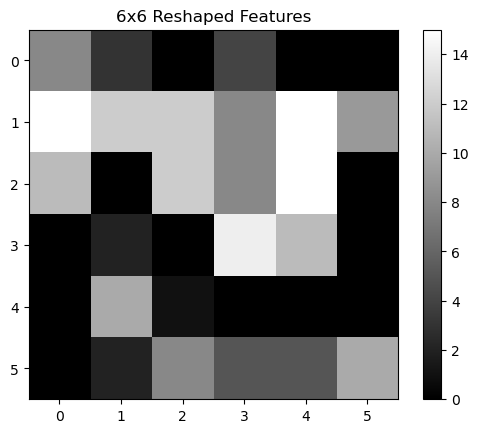

In [121]:
import matplotlib.pyplot as plt

plt.imshow(sample_6x6, cmap="gray")
plt.colorbar()
plt.title("6x6 Reshaped Features")
plt.show()

Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.92      0.90        36
           2       1.00      1.00      1.00        35
           3       0.93      1.00      0.96        37
           4       0.97      0.94      0.96        36
           5       0.95      1.00      0.97        37
           6       0.97      0.97      0.97        36
           7       0.97      0.97      0.97        36
           8       0.88      0.86      0.87        35
           9       1.00      0.92      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



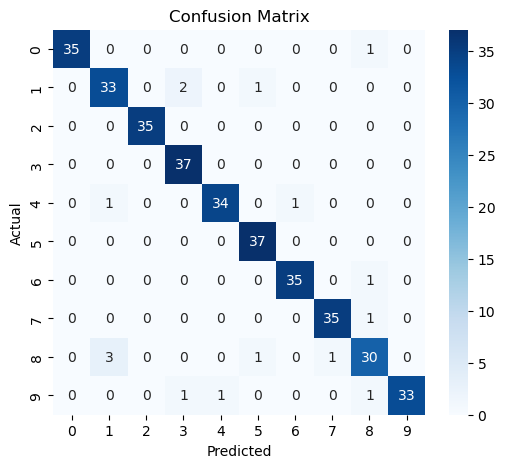

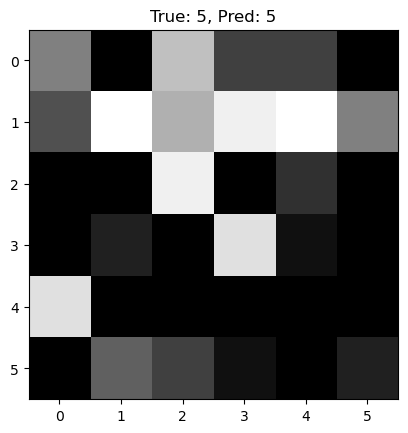

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


sample = X_test.iloc[0].values.reshape(6, 6)
plt.imshow(sample, cmap="gray")
plt.title(f"True: {y_test.iloc[0]}, Pred: {y_pred[0]}")
plt.show()


In [123]:
X_selected

,pixel_4_6,pixel_2_1,pixel_3_4,pixel_3_1,pixel_2_4,pixel_7_6,pixel_1_3,pixel_3_2,pixel_5_5,pixel_3_5,...,pixel_5_4,pixel_7_1,pixel_0_1,pixel_2_7,pixel_4_3,pixel_6_1,pixel_3_6,pixel_6_3,pixel_4_1,pixel_6_4
0,8.0,3.0,0.0,4.0,0.0,0.0,15.0,12.0,12.0,8.0,...,1.0,0.0,0.0,0.0,0.0,2.0,8.0,5.0,5.0,10.0
1,0.0,0.0,16.0,7.0,16.0,0.0,11.0,15.0,6.0,2.0,...,16.0,0.0,0.0,0.0,16.0,0.0,0.0,16.0,0.0,16.0
2,0.0,0.0,15.0,0.0,8.0,9.0,16.0,1.0,0.0,11.0,...,5.0,0.0,0.0,0.0,13.0,3.0,0.0,16.0,1.0,16.0
3,1.0,2.0,11.0,0.0,13.0,0.0,6.0,2.0,10.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,5.0
4,6.0,0.0,0.0,0.0,6.0,0.0,7.0,7.0,16.0,9.0,...,13.0,0.0,0.0,0.0,10.0,0.0,8.0,3.0,5.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,8.0,4.0,16.0,0.0,3.0,0.0,14.0,12.0,15.0,16.0,...,0.0,0.0,0.0,0.0,4.0,0.0,5.0,7.0,0.0,7.0
1793,6.0,3.0,0.0,4.0,0.0,0.0,15.0,16.0,16.0,10.0,...,9.0,0.0,0.0,0.0,0.0,1.0,8.0,16.0,8.0,16.0
1794,0.0,0.0,16.0,0.0,10.0,0.0,16.0,8.0,15.0,7.0,...,16.0,0.0,0.0,0.0,16.0,0.0,0.0,15.0,0.0,15.0
1795,4.0,4.0,7.0,5.0,3.0,0.0,16.0,16.0,16.0,16.0,...,0.0,0.0,0.0,0.0,14.0,0.0,4.0,7.0,0.0,7.0


In [124]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [128]:
import joblib

# Save the model
joblib.dump(clf, "Digit-classification.pkl")

# Load it back
clf_loaded = joblib.load("Digit-classification.pkl")
